In [46]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [47]:
N = 101                               
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)

In [48]:
sigmas = numpy.loadtxt("NACA0012_sigma.txt")
xs = numpy.loadtxt("NACA0012_x.txt")
ys = numpy.loadtxt("NACA0012_y.txt")

In [49]:
u_inf = 1.0       
u_freestream = u_inf * numpy.ones((N, N))
v_freestream = numpy.zeros((N, N))
psi_freestream = u_inf * Y

In [50]:
u_source_sum = 0
v_source_sum = 0
psi_source_sum = 0

In [51]:
for i in range(len(sigmas)):
    strength_source = sigmas[i]
    x_source = xs[i]
    y_source = ys[i]
    u_source = (strength_source / (2 * math.pi) *
            (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2))
    v_source = (strength_source / (2 * math.pi) *
            (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2))
    psi_source = strength_source / (2 * numpy.pi) * numpy.arctan2((Y - y_source), (X - x_source))
    u_source_sum = u_source_sum + u_source
    v_source_sum = v_source_sum + v_source
    psi_source_sum = psi_source_sum + psi_source

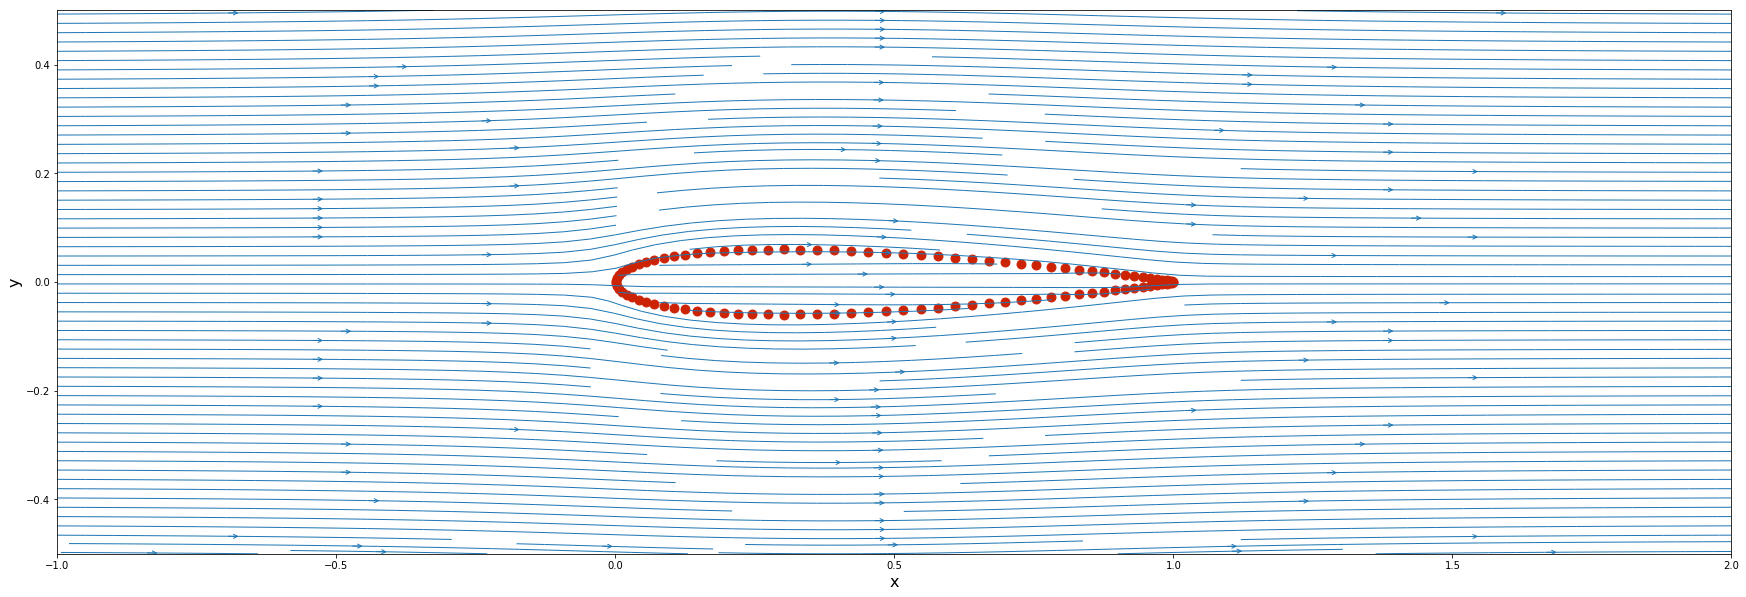

In [58]:
u = u_freestream + u_source_sum
v = v_freestream + v_source_sum
psi = psi_freestream + psi_source_sum

width = 30.0
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')


for i in range(len(sigmas)):
    x_source = xs[i]
    y_source = ys[i]
    pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

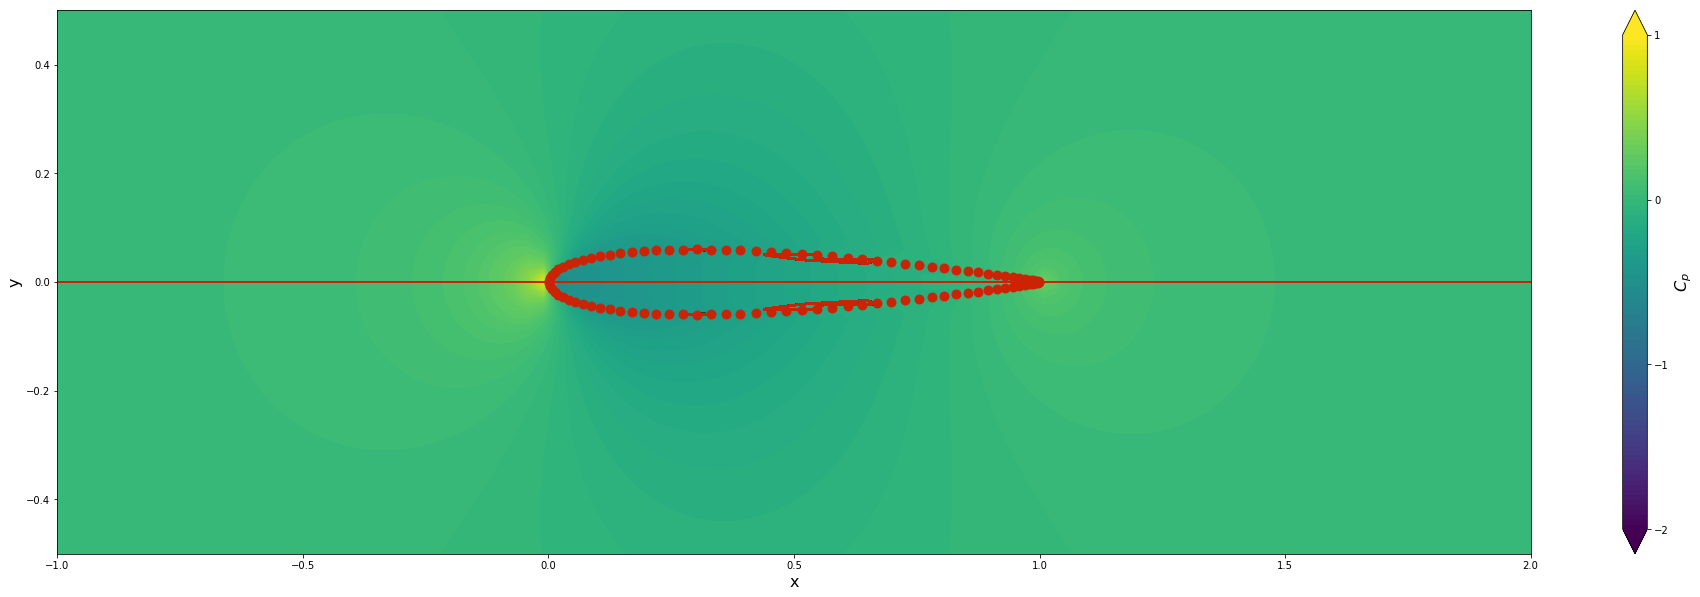

In [61]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

width = 30
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])


for i in range(len(sigmas)):
    x_source = xs[i]
    y_source = ys[i]
    pyplot.scatter(x_source, y_source,
                   color='#CD2305', s=80, marker='o')
    pyplot.contour(X, Y, psi,
                   levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');